In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [9]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090518-spark-3bar

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090518-spark-3bar


In [4]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
files.sort()
files

['125-motor-10.txt',
 '125-motor-22.txt',
 '125-motor-28.txt',
 '125-motor-34.txt']

In [5]:
ml = 1e3
hold = np.loadtxt('125-motor-10.txt')
X10 = hold[0]*ml
Y10 = hold[1]*ml

hold = np.loadtxt('125-motor-22.txt')
X22 = hold[0]*ml
Y22 = hold[1]*ml

hold = np.loadtxt('125-motor-28.txt')
X28 = hold[0]*ml
Y28 = hold[1]*ml

hold = np.loadtxt('125-motor-34.txt')
X34 = hold[0]*ml
Y34 = hold[1]*ml

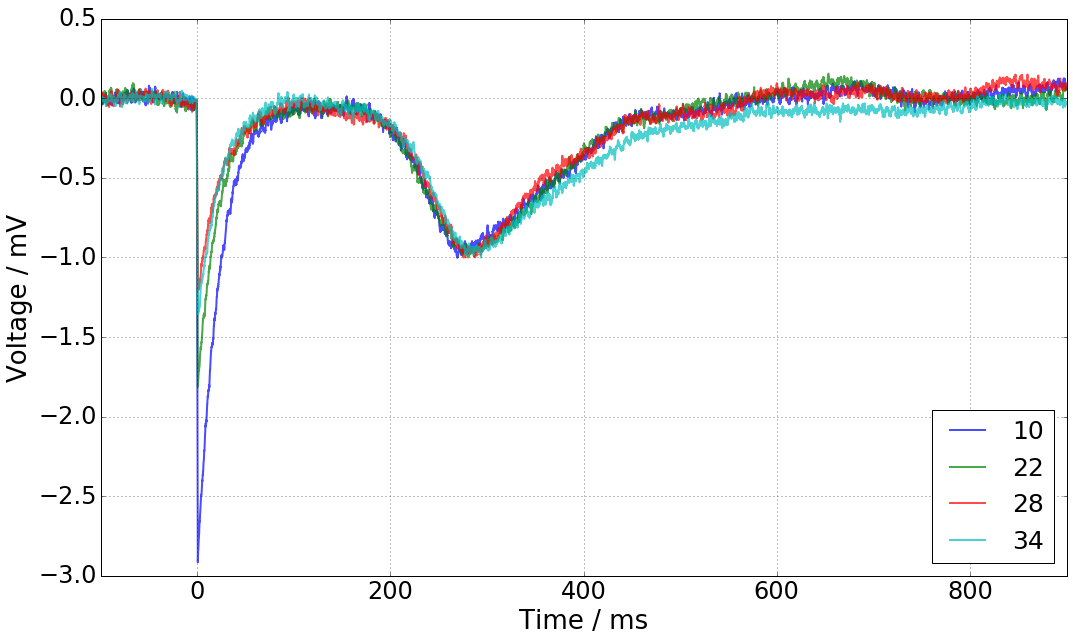

In [18]:
Xvals=[]
Yvals=[]
plt.figure(figsize=(15,9))

EH = 10

XX = moving_average(X10,n=EH)
YY = moving_average(Y10,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY/max(abs(YY*(XX>200))),label='10',alpha=0.7,linewidth=2)

XX = moving_average(X22,n=EH)
YY = moving_average(Y22,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY/max(abs(YY*(XX>200))),label='22',alpha=0.7,linewidth=2)

XX = moving_average(X28,n=EH)
YY = moving_average(Y28,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY/max(abs(YY*(XX>200))),label='28',alpha=0.7,linewidth=2)

XX = moving_average(X34,n=EH)
YY = moving_average(Y34,n=EH)
Xvals.append(XX)
Yvals.append(YY)
plt.plot(XX,YY/max(abs(YY*(XX>200))),label='34',alpha=0.7,linewidth=2)


plt.xlim(-.1*ml,900)
#plt.ylim(-0.4,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-circ-90518.tif')
plt.show()

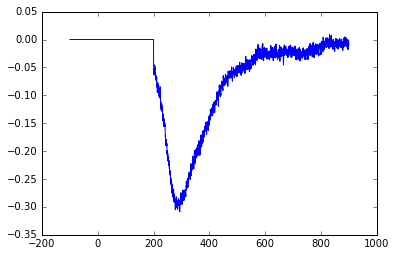

In [17]:
plt.plot(XX,YY*(XX>200))

In [21]:
names = []
for q in range(0,len(files)):
    na = files[q].split('-')[0]
    names.append(na)
names

['050', '075', '100', '125', '150', '175', '200']

In [22]:
ml = 1e3
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = Hold[0]*ml
    Yvals[q] = Hold[1]*ml

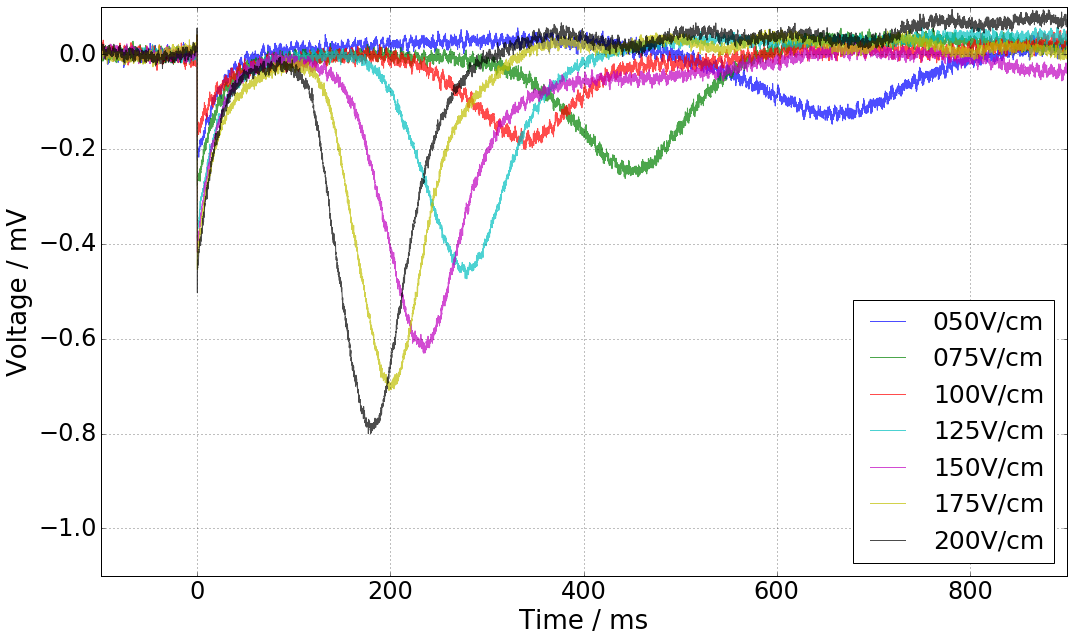

In [23]:
plt.figure(figsize=(15,9))

for q in range(0,len(files)):
    P=21
    PP=3
    XX = savgol_filter(Xvals[q],P,PP)
    YY = savgol_filter(Yvals[q],P,PP)
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-.1*ml,900)
plt.ylim(-1.1,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-clean-90418.tif')
plt.show()

In [9]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


In [10]:
time,width = find_vals(Xvals[0],Yvals[0],Cut)
time

565.41007344975333

In [11]:
Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    time,width = find_vals(Xvals[q],Yvals[q],Cut)
    V      = 20/(time*1e-3)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [12]:
FWHM

array([ 228.41999423,  137.19999653,  114.8799971 ,   99.99999747,
         81.35999794,   74.05999813,   66.09999833])

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


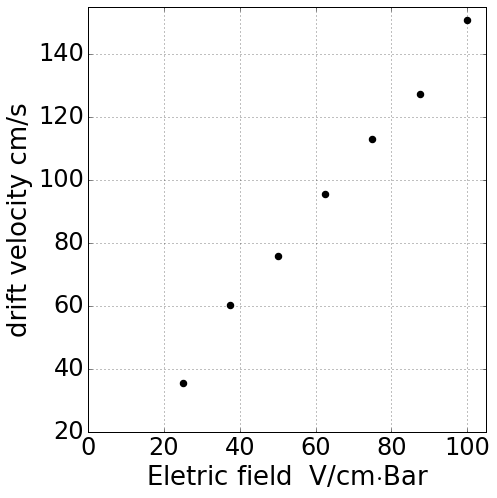

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(Efield/2,Velocity,color='k',linewidth=3)

plt.xlim(0,105)
plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [16]:
vals = np.polyfit(Efield/2,Velocity,1)
np.poly1d(vals)[0]

1.7264611024940004

In [17]:
vals

array([ 1.47765616,  1.7264611 ])

In [15]:
np.polyfit?

In [ ]:
poly

In [ ]:
FWHM[0:6]

In [ ]:
x = np.log(Efield[1:6])
y = np.log(FWHM[1:6])
poly=np.polyfit(x,y,1)

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,np.poly1d(poly)(x))

In [ ]:
poly

In [ ]:
np.poly1d?

In [ ]:
Efield, FWHM = zip(*sorted(zip(Efield, FWHM)))
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)
popt
pcov

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)

plt.figure(figsize=(7,7))
plt.scatter(Efield,FWHM,color='m',linewidth=3,label='data')
#plt.plot(Efield,ef(Efield,*popt),'r',label='fit')
x=np.arange(1,30,0.1)
plt.plot(np.exp(x),np.exp(np.poly1d(poly)(x)))

#vars=np.logspace(1,3,10)
#plt.plot(vars,10**np.poly1d(poly)(np.log(vars)))
plt.xlabel(r'Eletric field  V/cm',fontsize=26)
plt.ylabel(r'pulse FWHM ms',fontsize=26)
plt.xlim(10,1000)
plt.ylim(50,300)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(50, 210, 25))
plt.loglog()
plt.legend(loc="upper right",fontsize=24)
plt.show()